# Telecommunication Company Customer Churn Analysis

In [775]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt

In [776]:
telco_base_data = pd.read_csv('CustomerChurn.csv')
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [777]:
telco_base_data.shape

(7043, 21)

In [778]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [779]:
# Concise Summary of the dataframe,if we have too many columns, we can use the verbose = True mode
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


No null values.

Missing Data - Initial Intuition
- Here, we don't have any missing data.

But seems some problem with data type of a column.

## Data Cleaning

1. Create a copy of base data for manupulation & processing

In [780]:
telco_data = telco_base_data.copy()

In [781]:
#drop column customerID which is not relevent in this analysis
telco_data.drop(columns= ['customerID'], axis=1, inplace=True)
telco_data.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [782]:
# Checking the data types of all the columns
telco_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here TotalCharges is not in exact format.

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [783]:
# Convert to float (handling errors)
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

In [784]:
#Now we can check is there any null value in that column
telco_data.TotalCharges.isnull().sum()

11

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [785]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing. If it's more in percentage then we can fill that value as it is derived from 2 column as we analyse other values. Lets work both ways.

-- To fill that null values lets use it's depending column MonthlyCharges and Tenure to calculate the value.

In [786]:
#Using different dataframe for this way of handling missing value
telco_data_replacing_null_df = telco_data.copy()

In [787]:
telco_data_replacing_null_df['TotalCharges'].fillna(telco_data_replacing_null_df['tenure']*telco_data_replacing_null_df['MonthlyCharges'], inplace=True)
telco_data_replacing_null_df.TotalCharges.isnull().sum()

0

-- Removing missing values 

In [788]:
telco_data.dropna(how = 'any', inplace = True)
telco_data.TotalCharges.isnull().sum()

0

### Visualizing Missing

In [789]:
missing = pd.DataFrame((telco_data.isnull().sum())*100/telco_data.shape[0]).reset_index()
missing

,index,0
0,gender,0.0
1,SeniorCitizen,0.0
2,Partner,0.0
3,Dependents,0.0
4,tenure,0.0
5,PhoneService,0.0
6,MultipleLines,0.0
7,InternetService,0.0
8,OnlineSecurity,0.0
9,OnlineBackup,0.0


In [790]:
missing.columns = ['Feature', 'MissingPercentage']
missing

,Feature,MissingPercentage
0,gender,0.0
1,SeniorCitizen,0.0
2,Partner,0.0
3,Dependents,0.0
4,tenure,0.0
5,PhoneService,0.0
6,MultipleLines,0.0
7,InternetService,0.0
8,OnlineSecurity,0.0
9,OnlineBackup,0.0


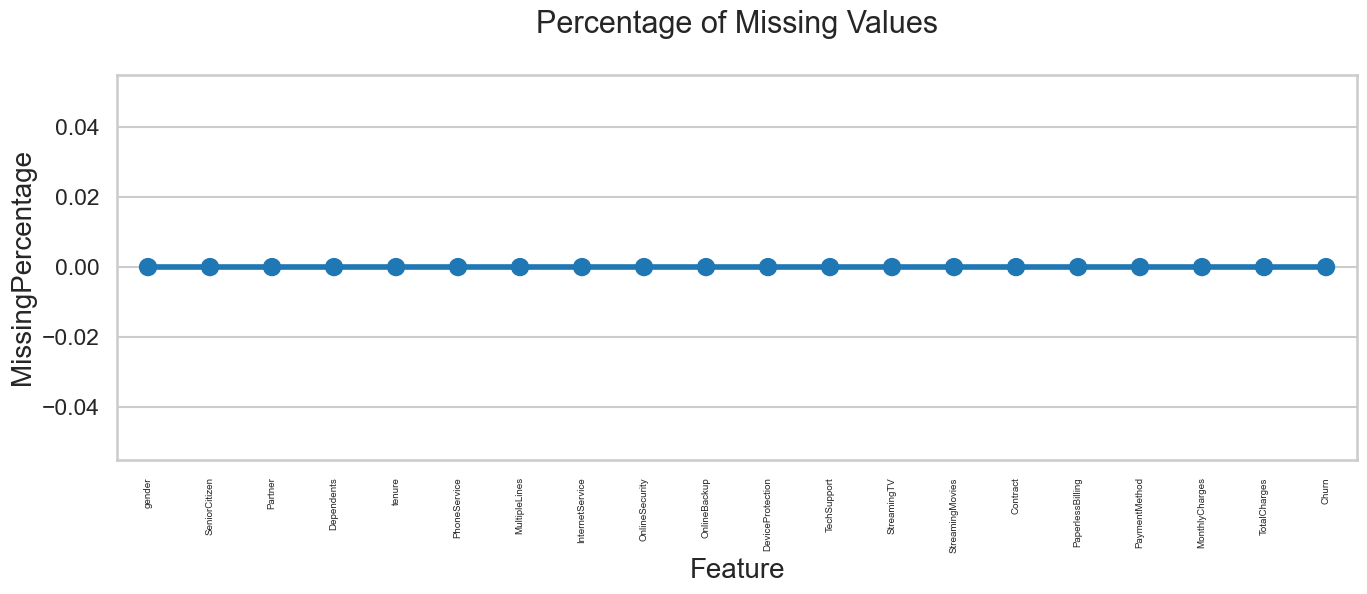

In [791]:
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Feature', y='MissingPercentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.show()

Missing Data - Final Intuition
- Here, we don't have any missing data.

## Numerical Analysis

In [792]:
# Check the descriptive statistics of numeric variables
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper.So ignoring that column.

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

Since mean and median of TotalCharge is 7043 and 1394.550 there is chance of having Outlier

In [793]:
telco_data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [794]:
telco_data['Churn'].value_counts()/len(telco_base_data)*100

Churn
No     73.306829
Yes    26.536987
Name: count, dtype: float64

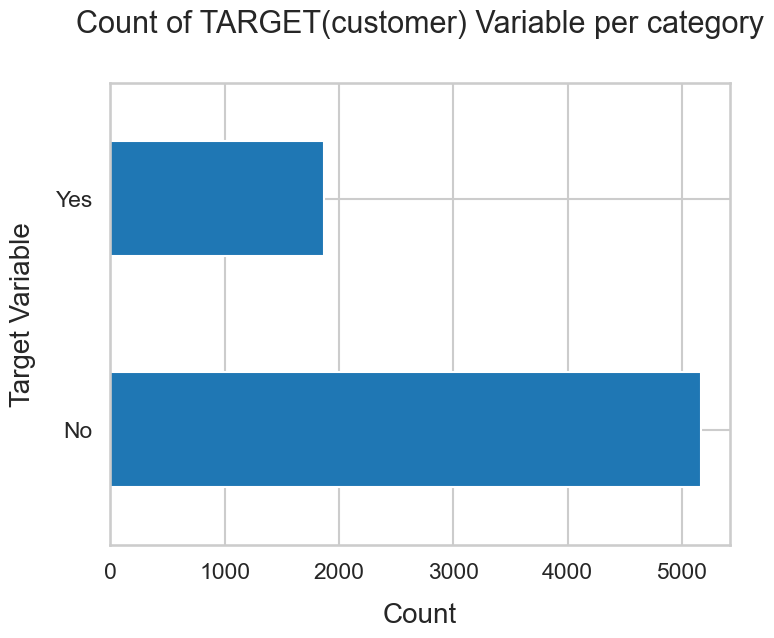

In [795]:
telco_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET(customer) Variable per category", y=1.02);

- Data is highly imbalanced, ratio = 73:27
- So we analyse the data with other features while taking the target values separately to get some insights.

In [796]:
telco_data.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [797]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [798]:
new_df1_target1.gender.value_counts()

Series([], Name: count, dtype: int64)

In [799]:
pd.crosstab(telco_data.PaymentMethod, telco_data.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


## Data Exploration
**1.** Plot distibution of individual predictors by churn

#### Univariate Analysis

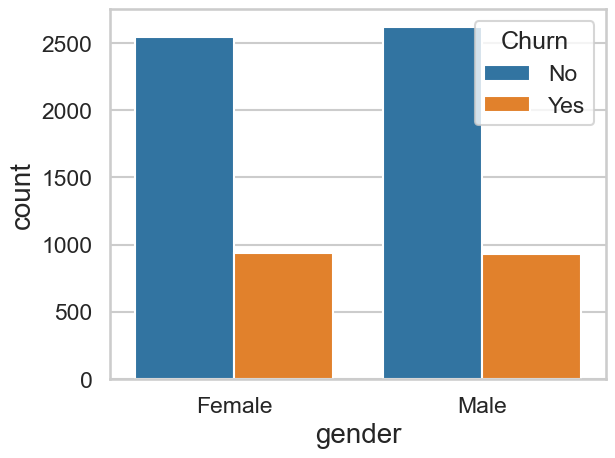

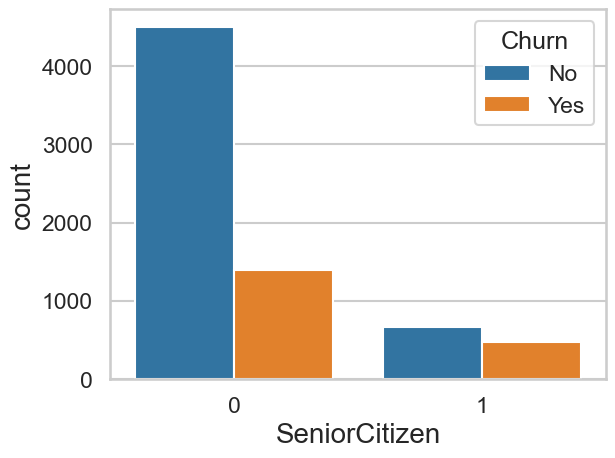

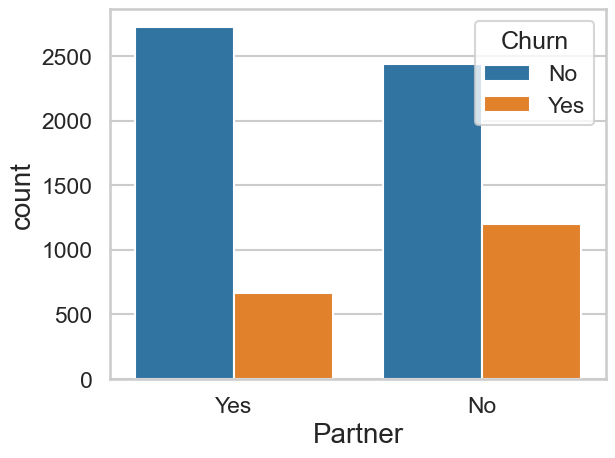

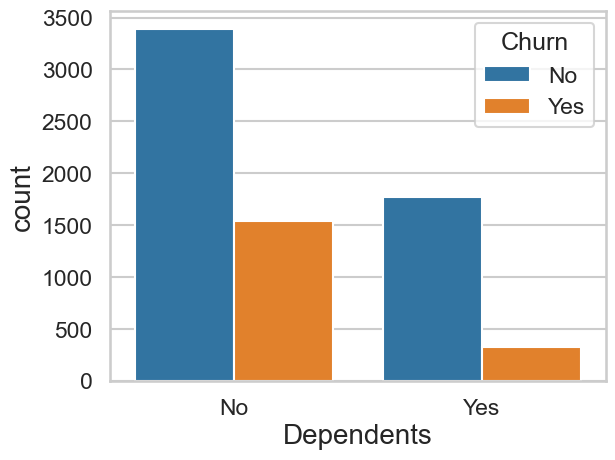

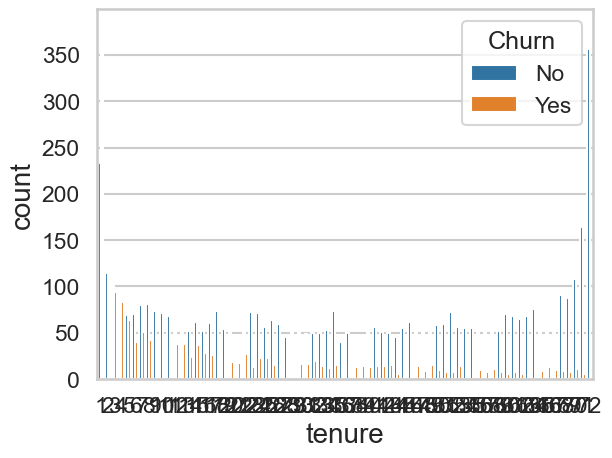

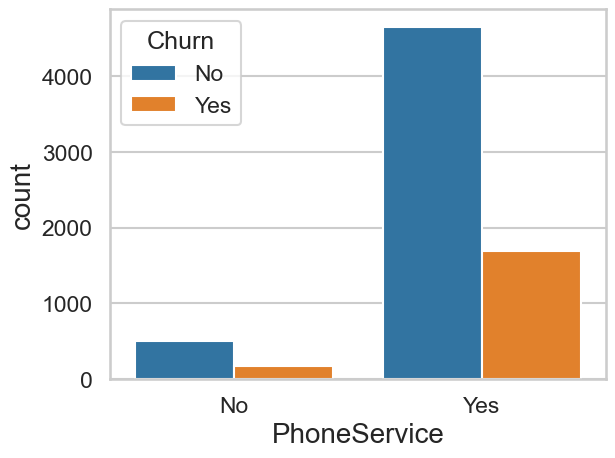

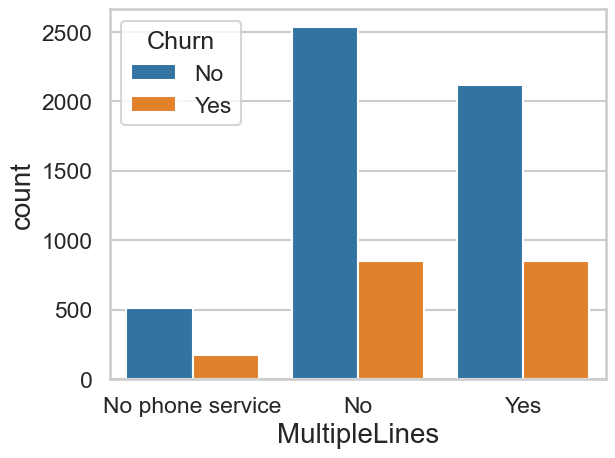

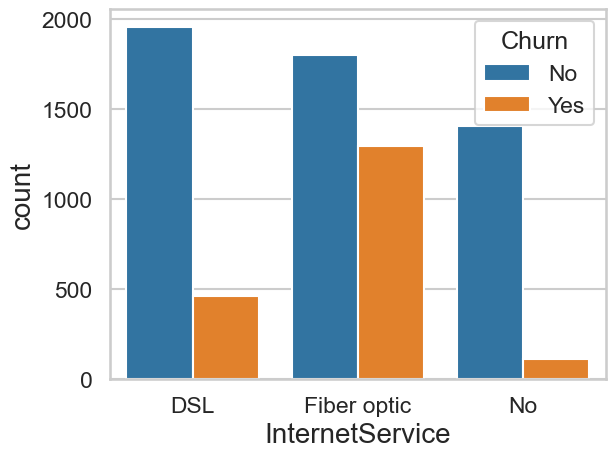

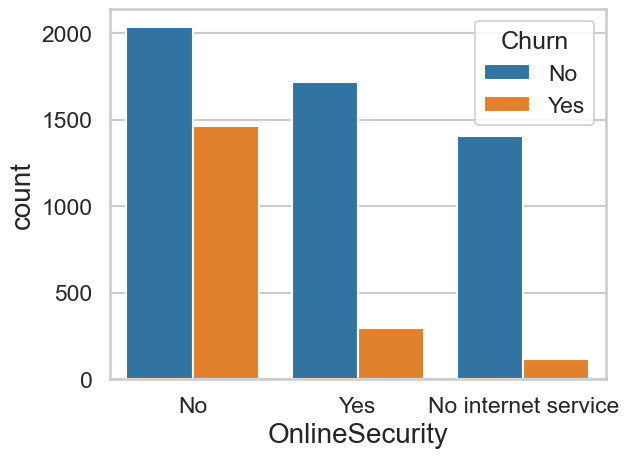

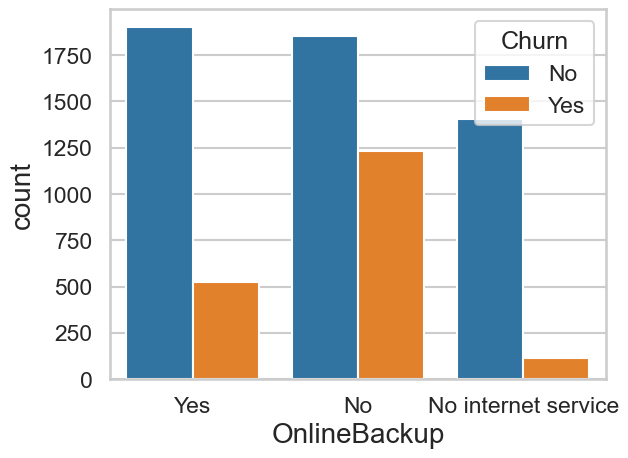

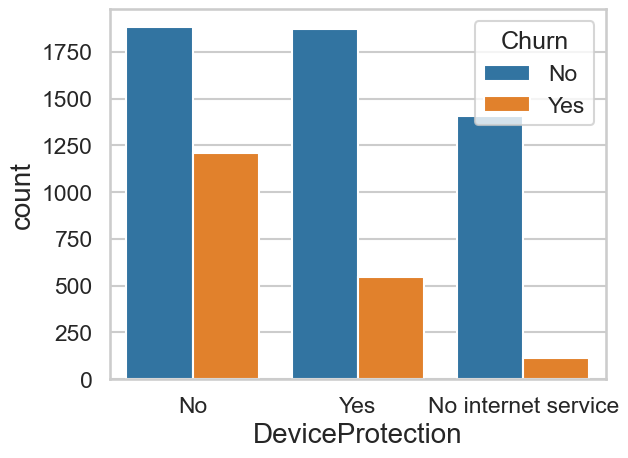

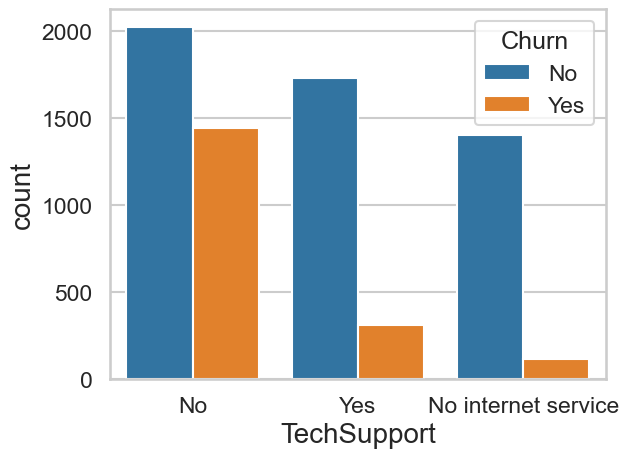

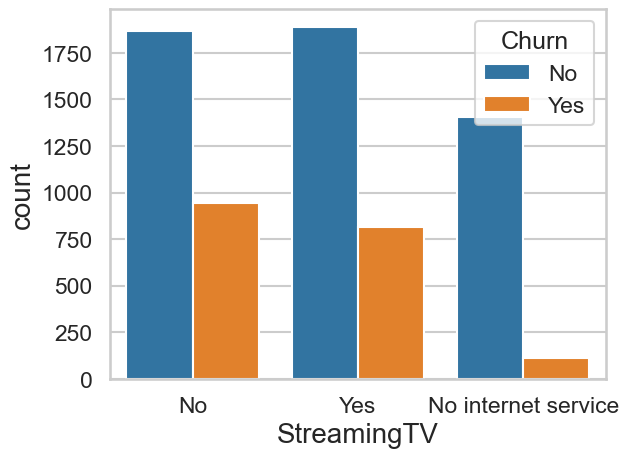

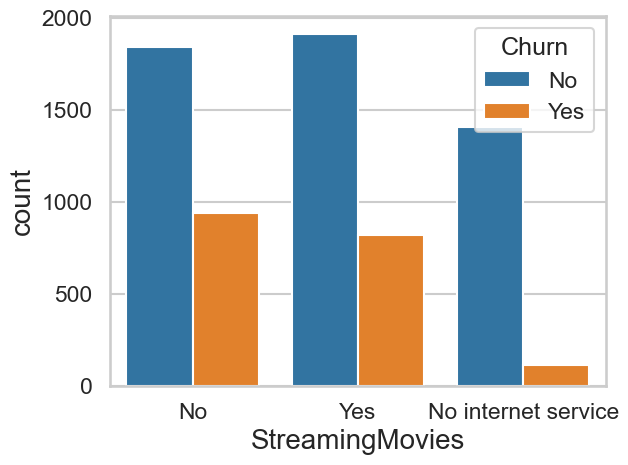

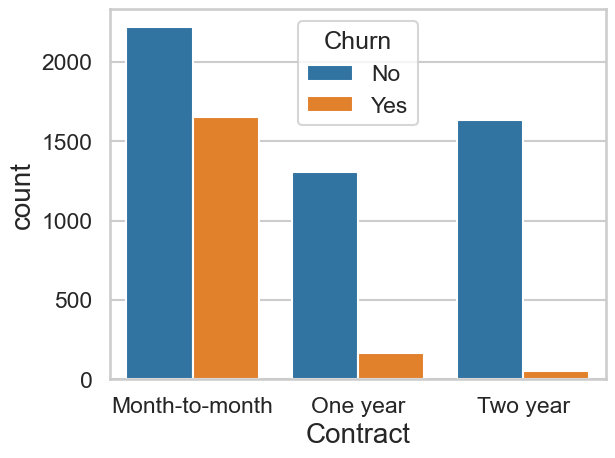

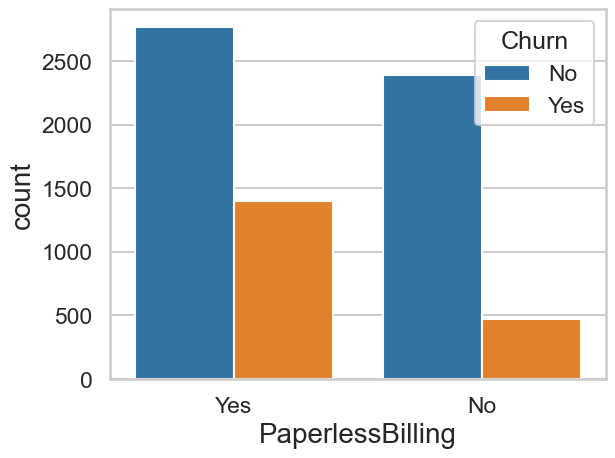

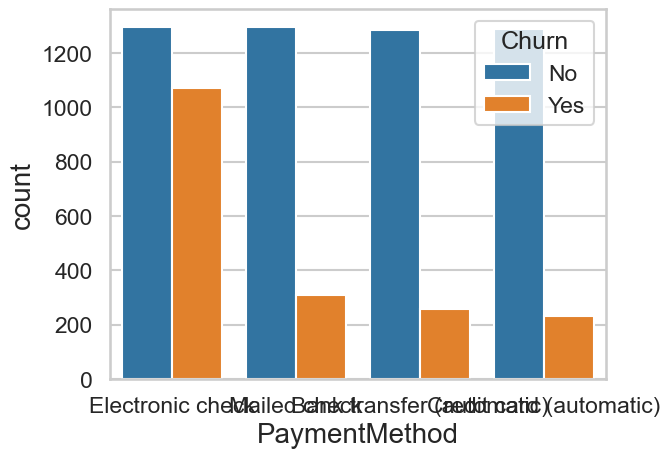

In [800]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])): #numerical column will analysed seperately and churn is target
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

Insights:
 1. Gender doesn't provide any insights
 2. Senior Citizens are more likely to churn
 3. Those who doesn't have partner are more likely to churn
 4. Those who do not have depends are churning more.
 5. More than 70% of customer without phone service is likely to churn
 6. More than 55% of customer churn don't have phone service while approximately 24.24% and 26.66% of customers are churning with no multiple lines and multiple lines respectively
 7. Those who are using Fiber Optic internet service is more likely to churn
 8. Customers without Online security, Online Backup,Device Protection and Tech Support is more likely to churn
 9. Streaming TV, Movies doesn't have impact
 10. Those who are using month to month contract, using paperless billing, payment method using electronic check are more likely to churn
 11. As we got before those who have tenure for less period are churn customers

## Bivariate Analysis

Relationship between Monthly Charges and Total Charges

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


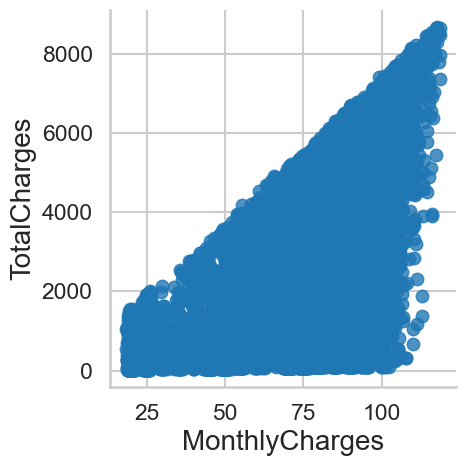

In [801]:
sns.lmplot(data=telco_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [802]:
telco_data['MonthlyCharges'].corr(telco_data['TotalCharges'])

0.6510648032262025

Positive correlation\
Total Charges increase as Monthly Charges increase - as expected.

Build a corelation of all predictors with 'Churn'

*Churn by Monthly Charges and Total Charges*

Text(0.5, 1.0, 'Monthly charges by churn')

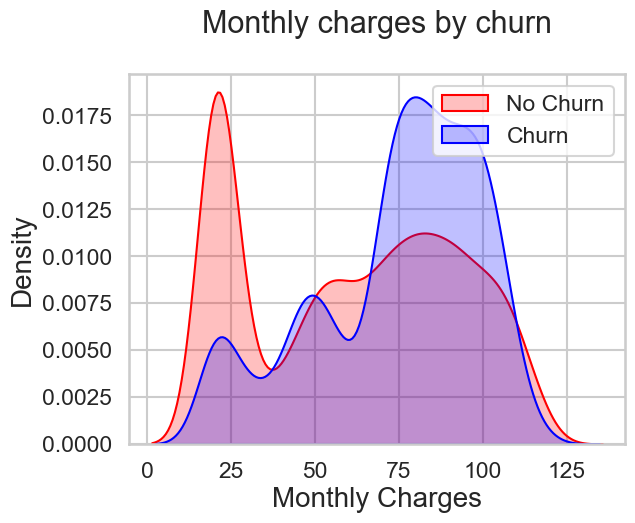

In [803]:
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 'No') ],
                color="Red", fill = True)
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 'Yes') ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')


**Insight:** Churn is high when Monthly Charges are high

Text(0.5, 1.0, 'Total charges by churn')

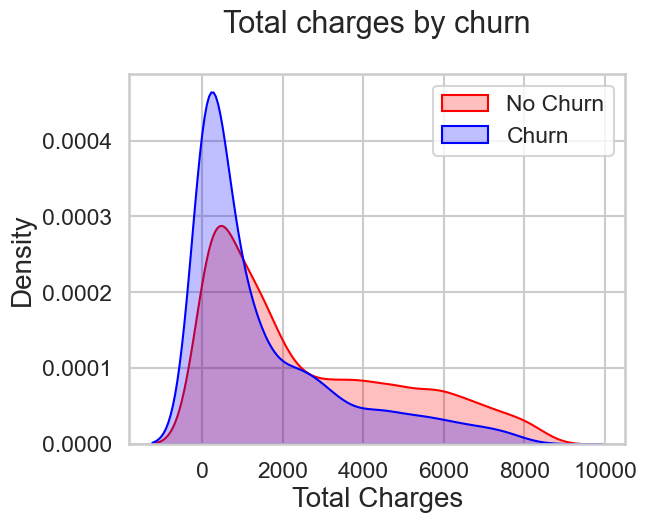

In [804]:
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 'No') ],
                color="Red", fill = True)
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 'Yes') ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')


**Surprising insight** as higher Churn at lower Total Charges (may be because of lower tenure)

However if we combine the insights of 3 parameters i.e. **Tenure, Monthly Charges & Total Charges** then the picture is bit clear :- *Higher Monthly Charge at lower tenure results into lower Total Charge*. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

Text(0.5, 1.0, 'tenure by churn')

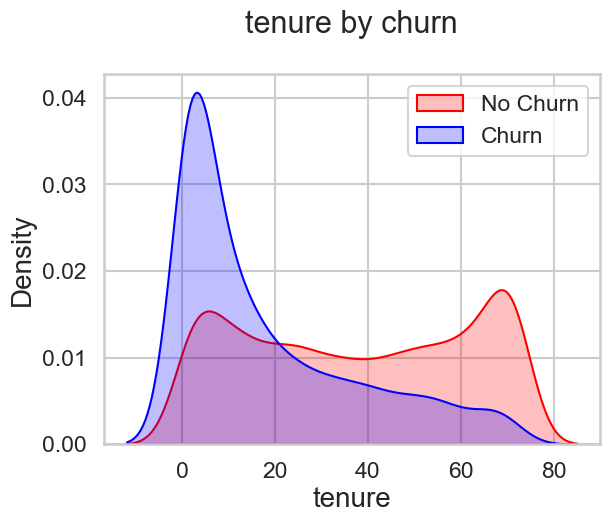

In [805]:
Tot = sns.kdeplot(telco_data.tenure[(telco_data["Churn"] == 'No') ],
                color="Red", fill = True)
Tot = sns.kdeplot(telco_data.tenure[(telco_data["Churn"] == 'Yes') ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('tenure')
Tot.set_title('tenure by churn')

So most of the customers have less or new tenure period. And those who have less or new tenure is churn more, while high tenure have less churn

## Feature Binning

Since Tenure is not in more compactable form, we are Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [806]:
# Get the max tenure
print(telco_data_dummies['tenure'].max())

72


In [807]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
print('Labels are: ', labels)
telco_data_dummies['tenure_group'] = pd.cut(telco_data_dummies.tenure, range(1, 80, 12), right=False, labels=labels)

telco_data_dummies['tenure_group'].value_counts()

Labels are:  ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [808]:
#drop column tenure
telco_data_dummies.drop(columns= ['tenure'], axis=1, inplace=True)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group
0,0,29.85,29.85,0,True,False,False,True,True,False,...,True,False,False,False,True,False,False,True,False,1 - 12
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,True,False,True,False,False,False,False,True,25 - 36
2,0,53.85,108.15,1,False,True,True,False,True,False,...,True,False,False,False,True,False,False,False,True,1 - 12
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,False,True,False,True,False,True,False,False,False,37 - 48
4,0,70.70,151.65,1,True,False,True,False,True,False,...,True,False,False,False,True,False,False,True,False,1 - 12


## Encoding
#### Target Encoding
Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [809]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [810]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

#### Dummy Encoding
Convert all the categorical variables into dummy variables

In [811]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [812]:
### Bivariate Analysis

new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [813]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

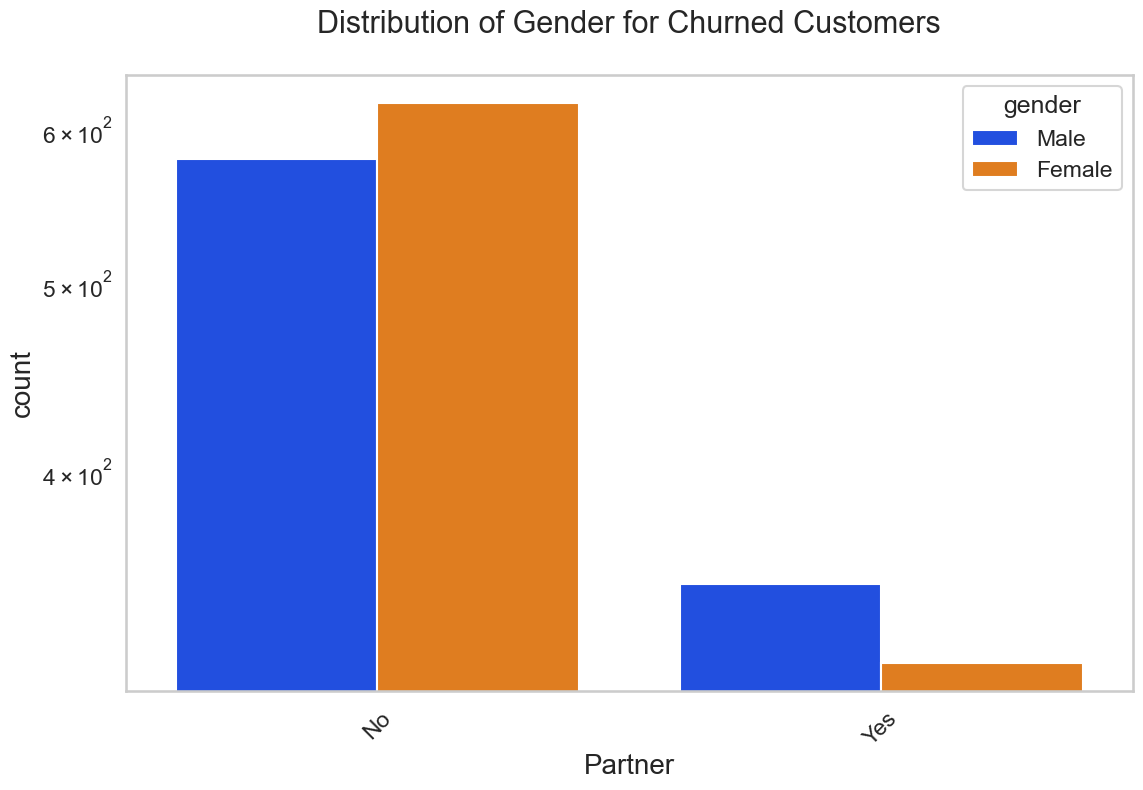

In [814]:

uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

Insight: Female customer without partner and men customer with partner are more likely to churn

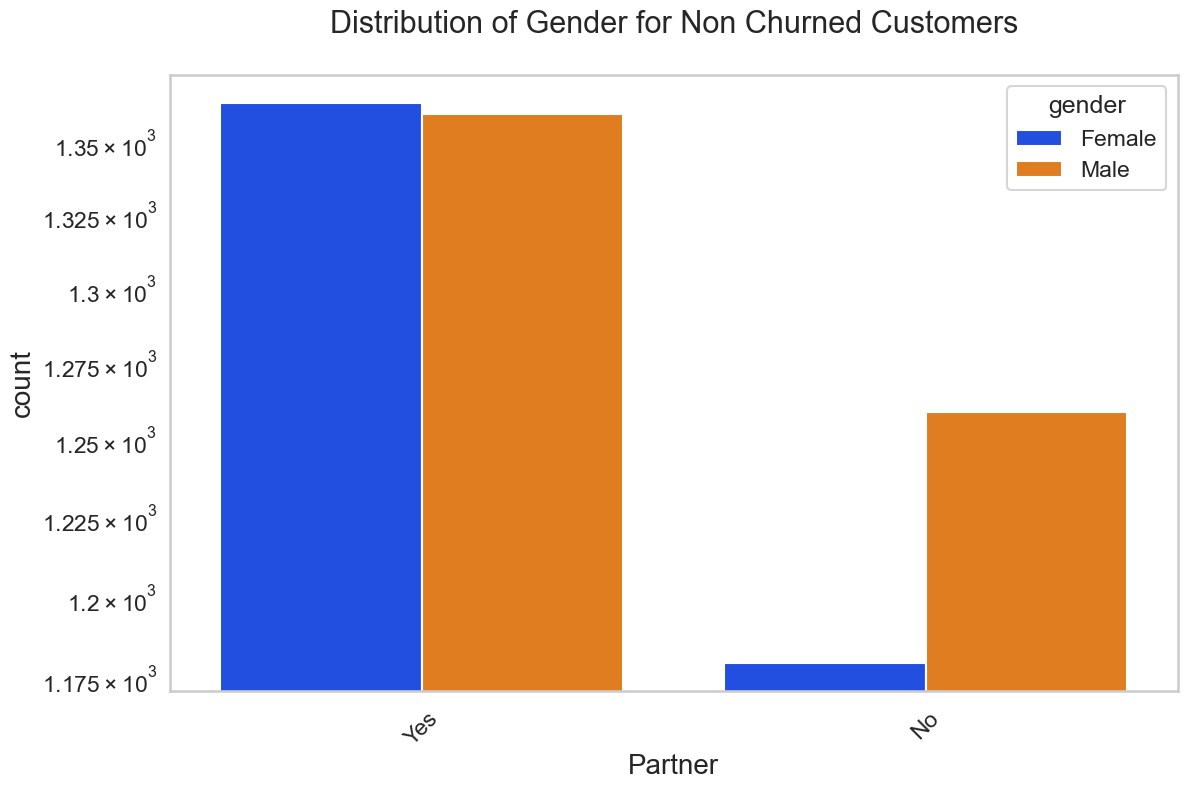

In [815]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

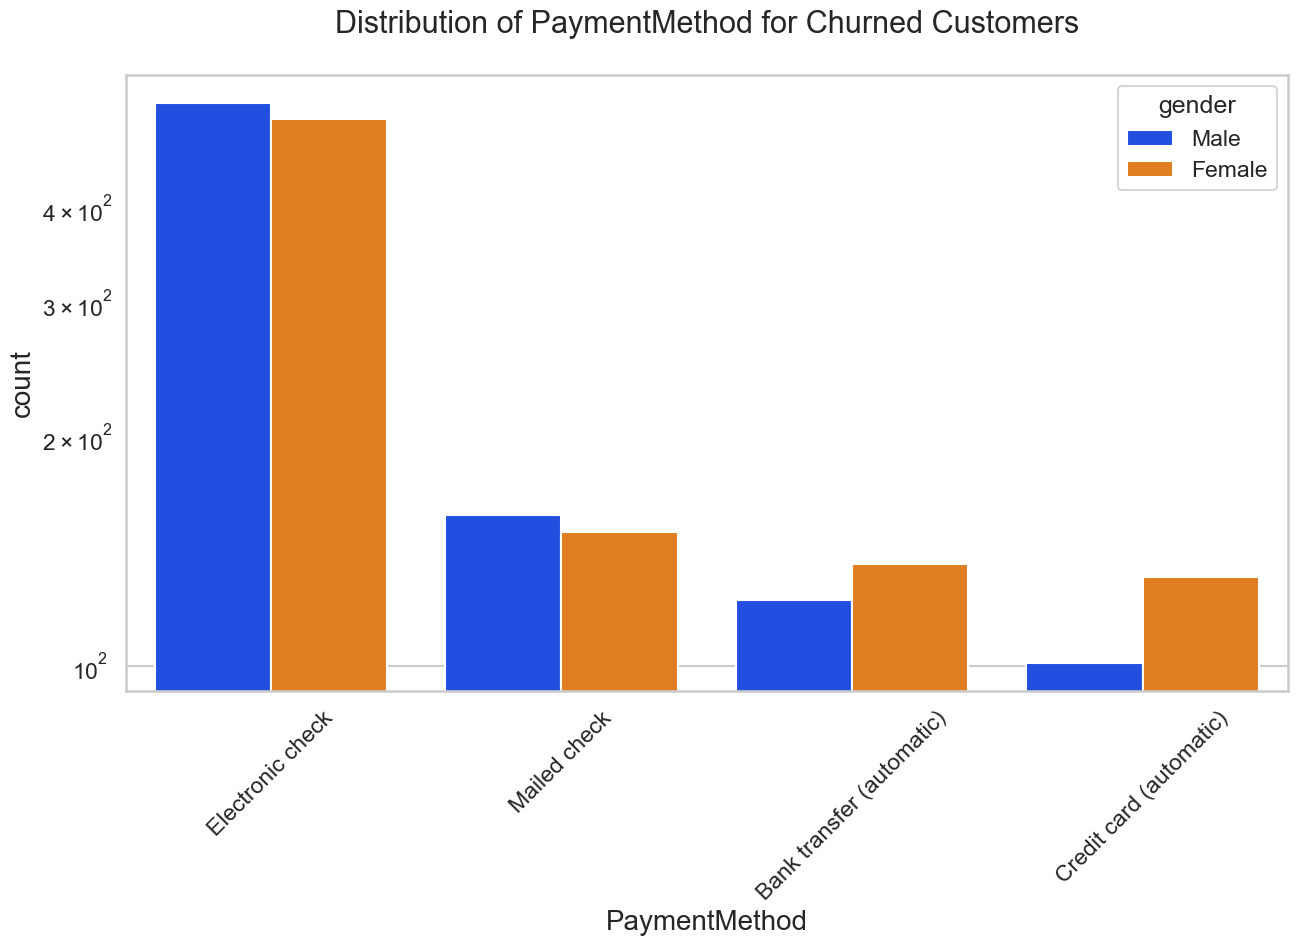

In [816]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

Insight: Female who are paying credit card asre more likely to churn as compared to men.

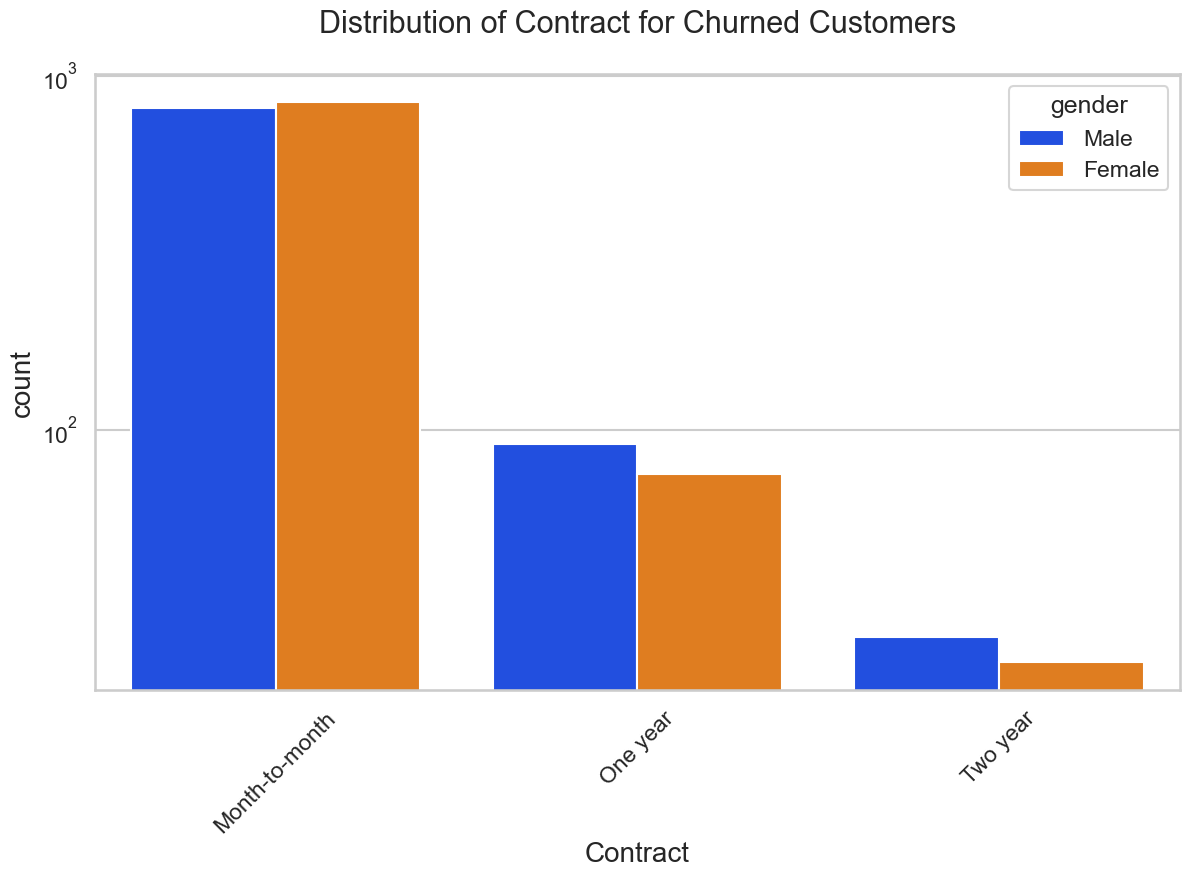

In [817]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

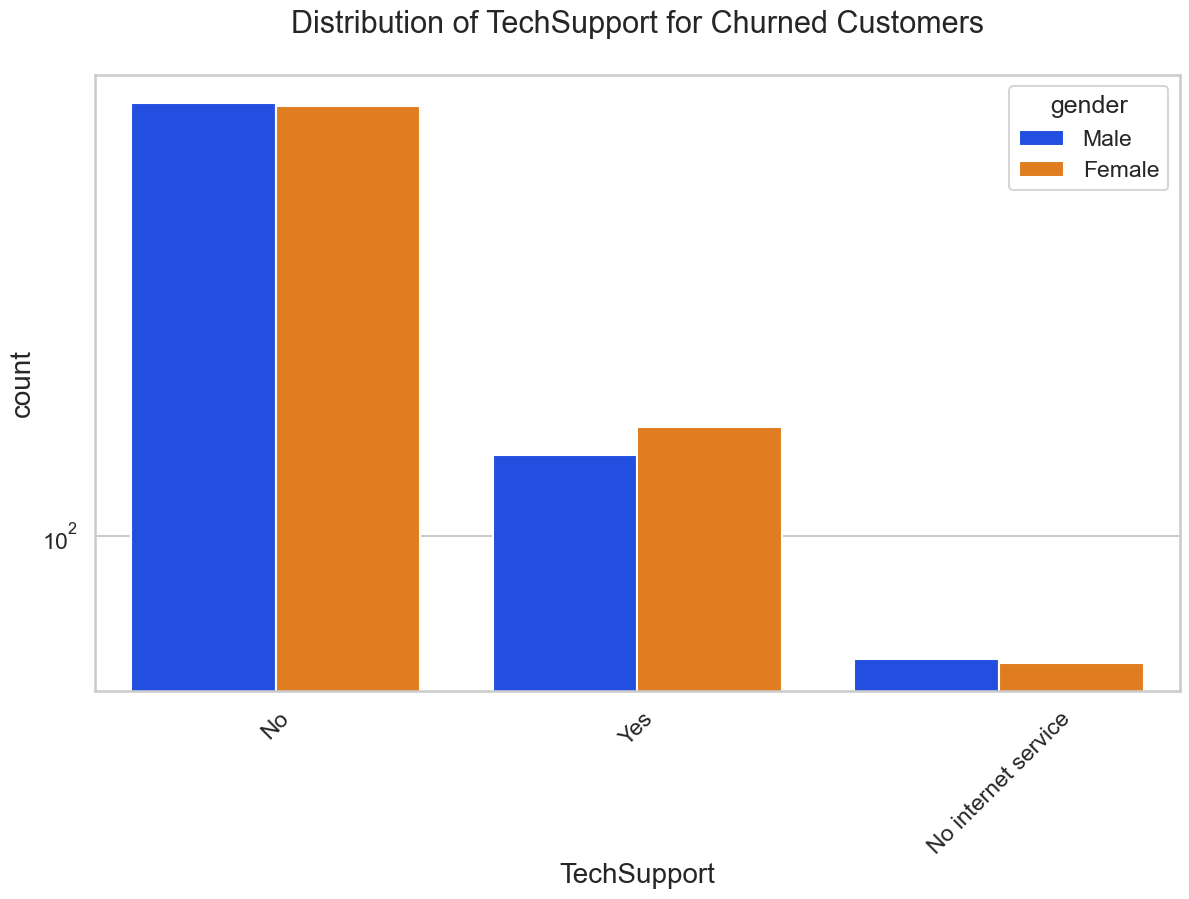

In [818]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

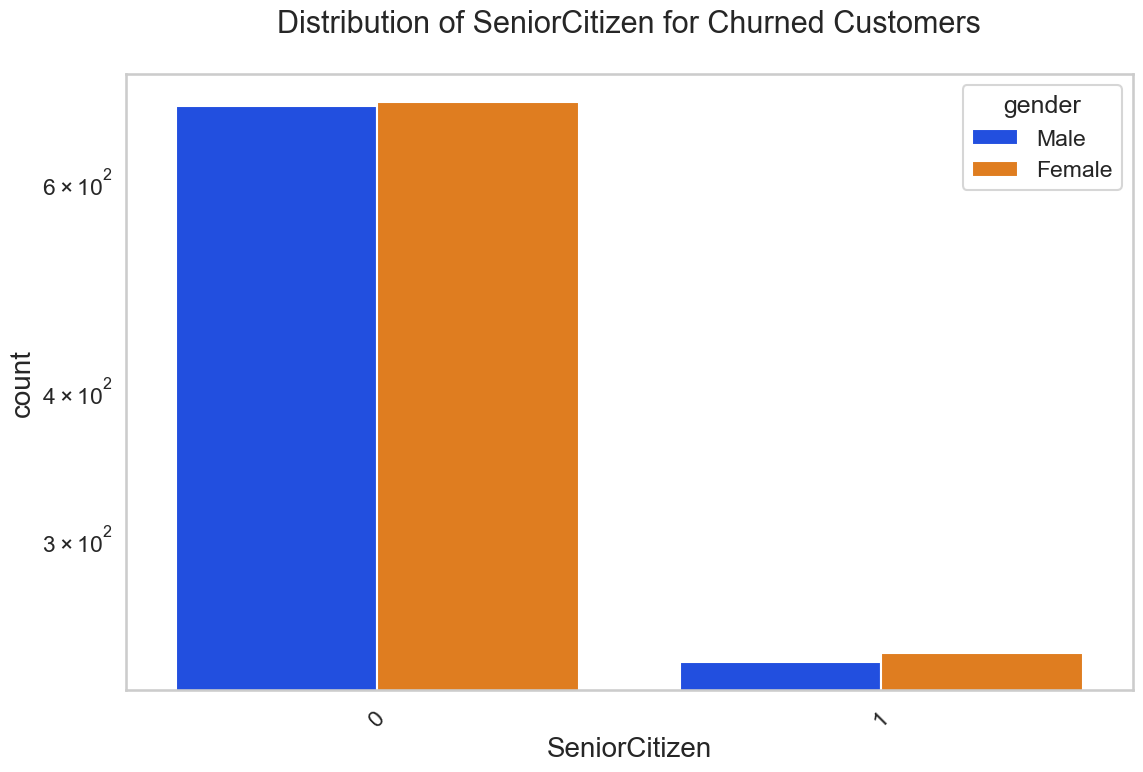

In [819]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

## Multivariate Analysis

<Axes: >

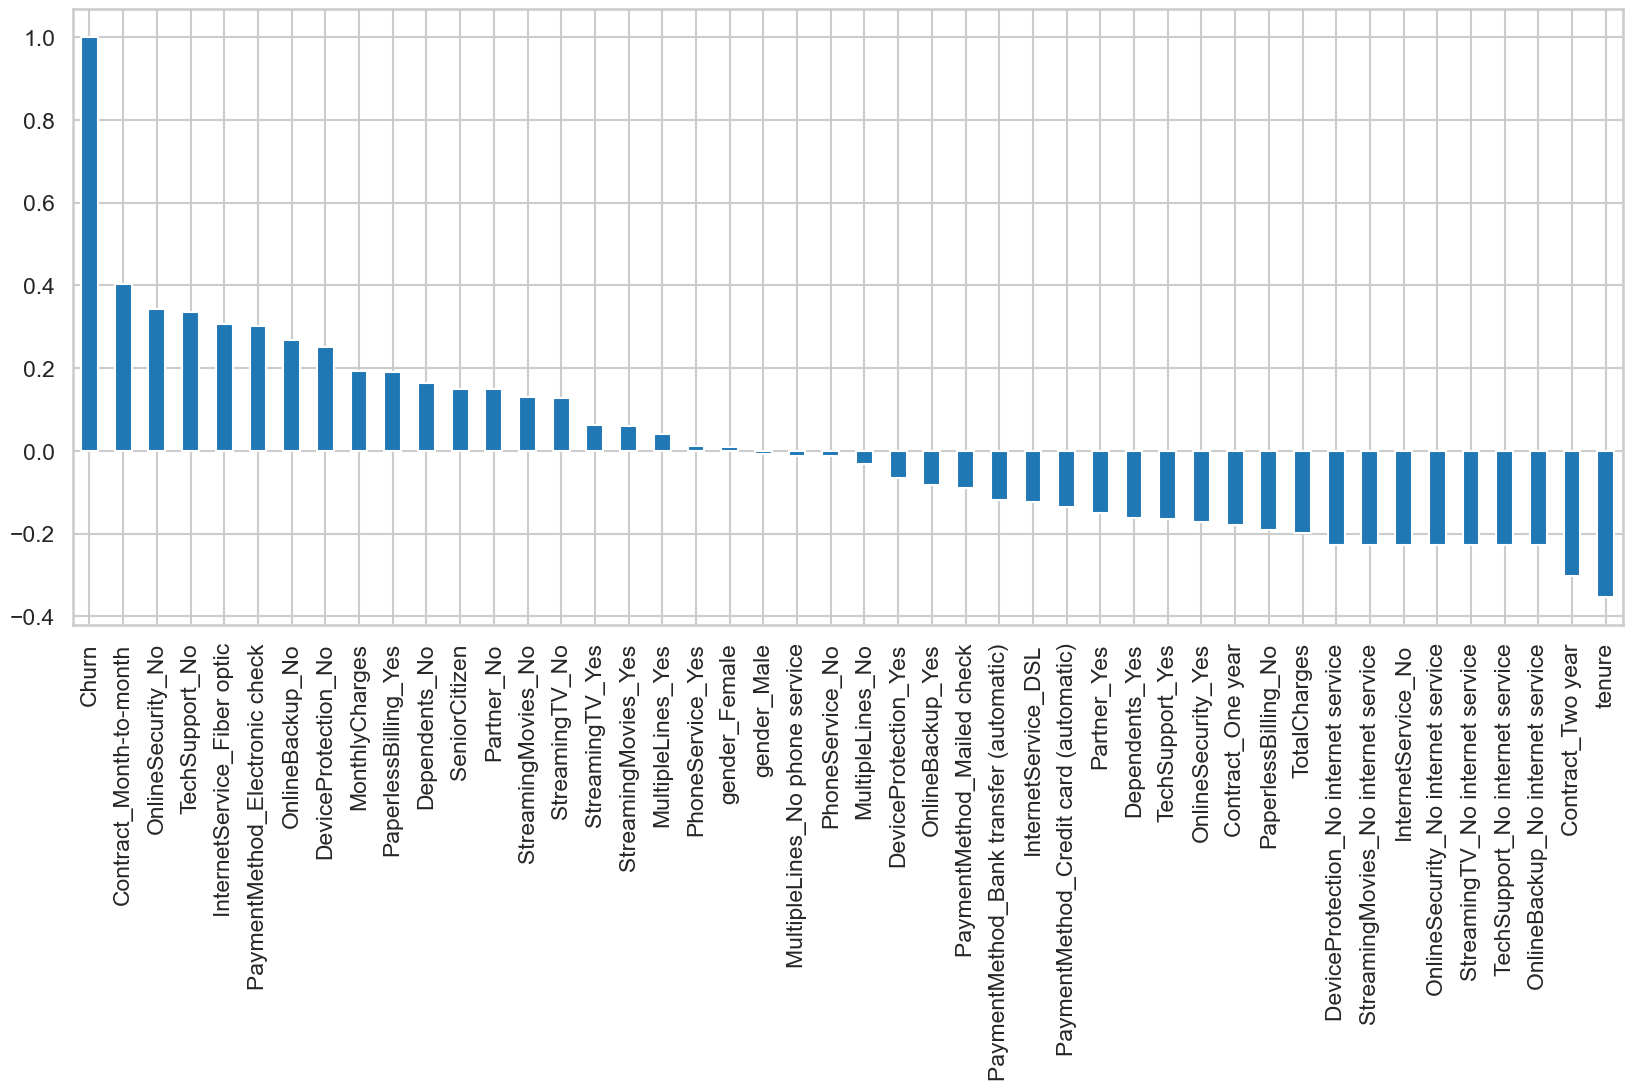

In [820]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Insights are same from Univariate analysis.

**Derived Insight:**

- HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

- LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

- Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<Axes: >

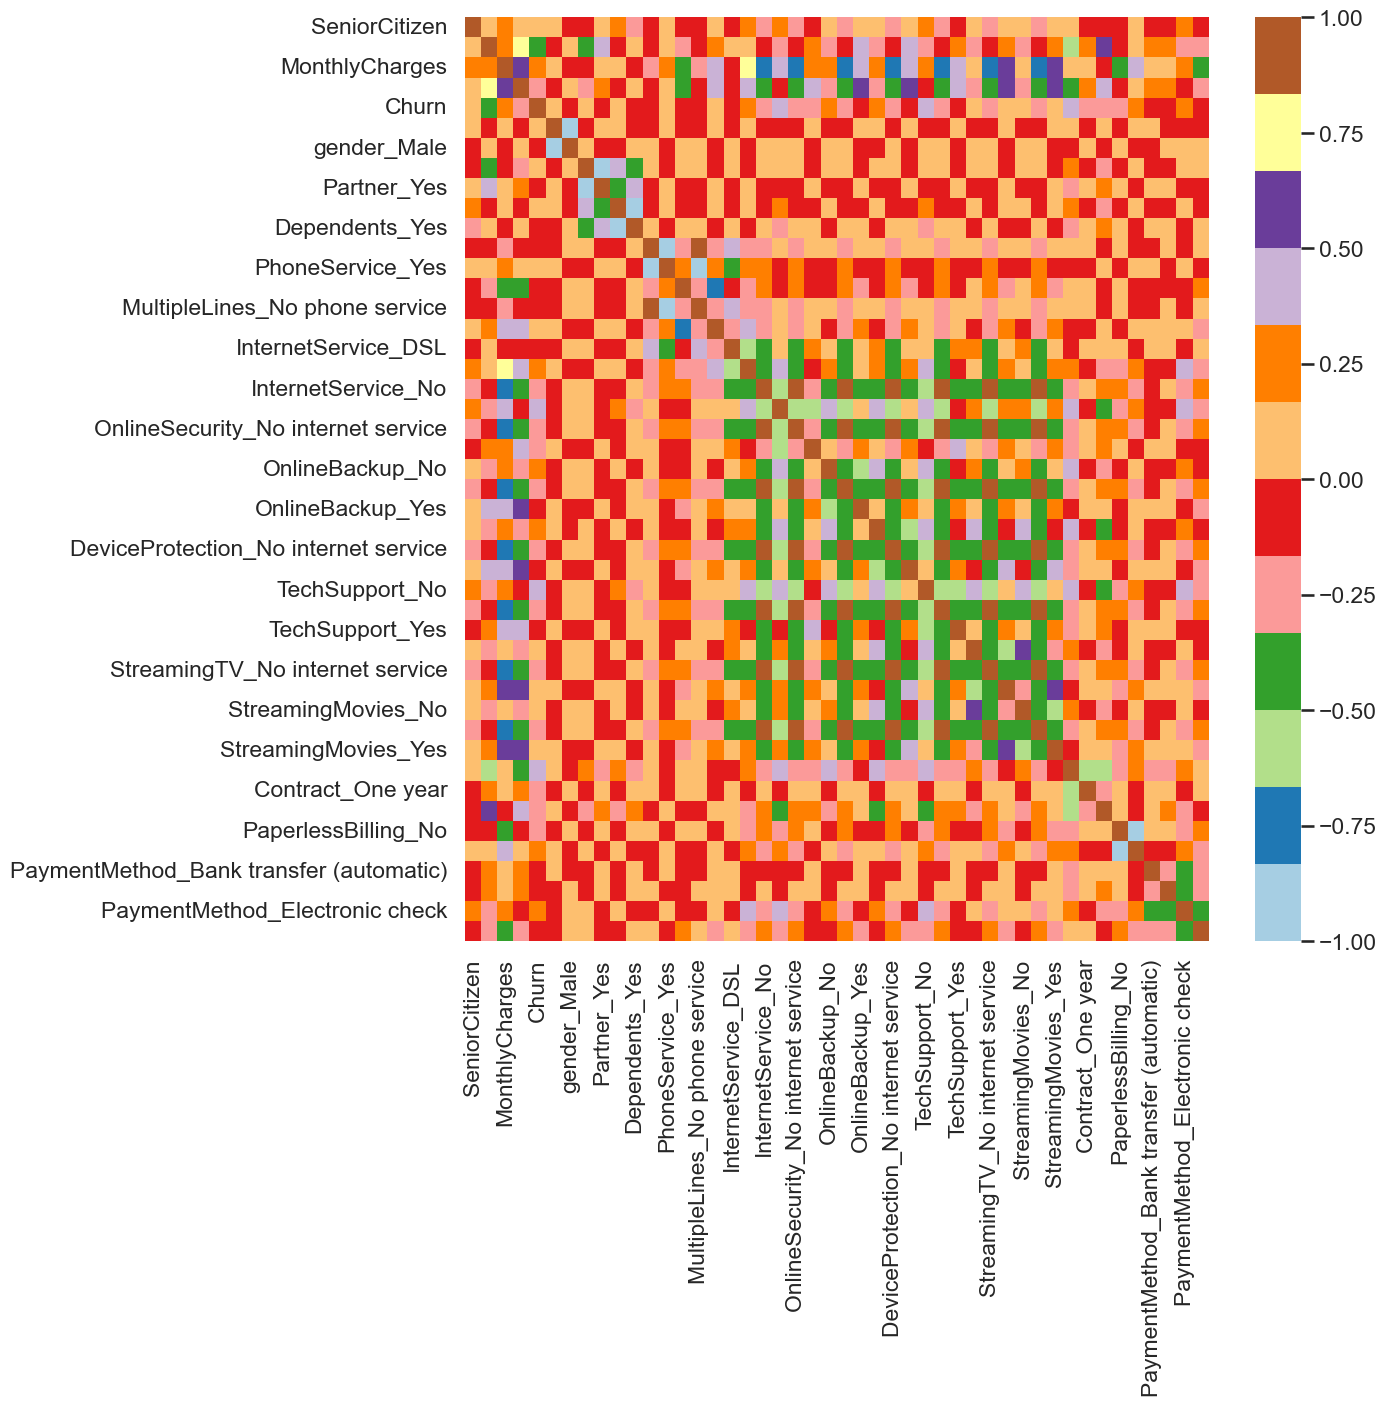

In [821]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

### Final Report for Stakeholders

##### Executive Summary

Customer churn is a critical issue in the telecommunication industry, impacting revenue and long-term business sustainability. This report presents key insights derived from exploratory data analysis (EDA) on customer churn patterns. The objective is to identify significant factors contributing to churn and provide data-driven recommendations to reduce customer attrition.

##### Key Insights & Findings

1. **High Churn Segments**

The analysis indicates that customer churn is significantly higher in the following cases:

- Contract Type: Month-to-month contract holders show the highest churn rates.

- Internet Service: Customers using Fiber Optics internet service churn at a much higher rate.

- Online Security & Tech Support: Lack of these services correlates with higher churn.

- Subscription Tenure: First-year subscribers are more likely to churn.

- Pricing: Higher monthly charges combined with lower tenure and total charges lead to higher churn.

2. **Low Churn Segments**

On the other hand, customers in the following categories are less likely to churn:

- Contract Type: Long-term contract holders exhibit significantly lower churn.

- Internet Service: Subscriptions without internet service have lower churn.

- Customer Tenure: Customers engaged for 5+ years tend to stay longer.

3. **Insignificant Factors**

- Gender: Has minimal impact on churn.

- Phone Service & Multiple Lines: No strong correlation with churn was observed.

4. Additional Observations

> Demographics & Household Status:

- Senior citizens are more likely to churn.

- Customers without a partner or dependents tend to churn more.

> Service Features & Churn Relationship:

- Customers without online security, backup, device protection, and tech support are more likely to churn.

- Streaming services (TV, Movies) do not significantly impact churn.

> Billing & Payment Methods:

- Paperless billing and electronic check payments are associated with higher churn rates.

- Customers on month-to-month billing are more likely to leave.

> Correlation Insights

- High Monthly Charges → Higher churn.

- Total Charges & Monthly Charges are positively correlated.

- Lower tenure with high monthly charges leads to lower total charges, contributing to churn.

> Recommendations

- Improve Retention Strategies for High-Risk Segments

- Offer discounts or incentives for long-term contract conversions.

- Implement targeted retention campaigns for new customers (<1 year tenure).

- Enhance Service Offerings

- Provide free trials for online security, backup, and tech support to retain customers.

- Improve Fiber Optic service quality and customer experience.

- Optimize Pricing Models

- Reduce high monthly charges for new customers.

- Offer bundled pricing options with long-term benefits.

- Address Payment & Billing Concerns

- Encourage automatic payments and credit card billing over electronic checks.

- Provide incentives for non-paperless billing users to continue engagement.

##### Conclusion

The insights derived from this analysis emphasize the key drivers of customer churn in the telecommunication sector. A strategic focus on contract types, pricing models, service offerings, and targeted retention programs can significantly reduce customer churn and improve long-term customer loyalty. By implementing data-driven recommendations, the company can enhance customer satisfaction and drive sustainable growth.